In [27]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.figsize'] = (12, 6)
pokedados=pd.read_csv("Pokemon.csv")
pd.options.mode.chained_assignment = None

In [28]:
print(pokedados.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65       65     45           1     False  
1       80       80     60           1     False  
2      100      100     80           1     False  
3      122      120     80           1     False  
4       60       50     65           1     False  


In [50]:
def SetDataFrameType(dataframeN,type1,type2):
    index=[]
    dataframe=dataframeN.fillna("None")
    for i in range(len(dataframe)):
        if type2=="All":
            if dataframe["Type 1"][i]==type1 or dataframe["Type 2"][i]==type1:
                index.append(i)
        if type2=="None":
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]=="None":
                index.append(i)      
        else:
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]==type2 or dataframe["Type 1"][i]==type2 and dataframe["Type 2"][i]==type1:
                index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    return DF

def SetDataFrameLegendary(dataframe):
    index=[]
    for i in dataframe.index:
        if dataframe["Legendary"][i]==True:
            index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    
    return DF

def Generation(dataframe,gen):
    DF=dataframe.loc[(dataframe.Generation == gen)]
    
    return DF
    
def Group(dataframe,x):
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
    
    return dataframe
            
            
        
    

In [54]:
DFWater=SetDataFrameType(pokedados,"Fire","All")
f1 = DFWater['HP'].values
f2 = DFWater['Attack'].values
f3 = DFWater['Sp. Atk'].values
f4 = DFWater['Defense'].values
f5 = DFWater['Sp. Def'].values
f6 = DFWater['Speed'].values
X=np.array(list(zip(f1,f2,f3,f4,f5,f6))).reshape(len(f1),6)
kmeans = KMeans(n_clusters=4).fit(X)

x= kmeans.fit_predict(X)
print(x)
a = Group(DFWater,x)
a

[1 1 3 0 3 1 2 1 2 1 2 2 2 3 1 1 3 1 1 1 2 3 1 2 0 1 1 2 0 1 2 0 0 0 1 1 2
 3 3 3 3 1 1 2 1 2 1 2 3 1 1 3 2 1 3 0 1 1 3 1 2 1 3 0]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,Group 2
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,Group 2
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 4
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 4
42,37,Vulpix,Fire,None,299,38,41,40,50,65,65,1,False,Group 2
43,38,Ninetales,Fire,None,505,73,76,75,81,100,100,1,False,Group 3
63,58,Growlithe,Fire,None,350,55,70,45,70,50,60,1,False,Group 2
64,59,Arcanine,Fire,None,555,90,110,80,100,80,95,1,False,Group 3
83,77,Ponyta,Fire,None,410,50,85,55,65,65,90,1,False,Group 2


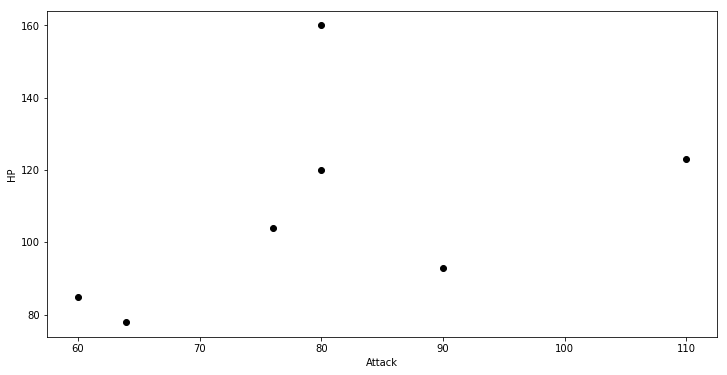

In [31]:
DFWater=SetDataFrameType(pokedados,"Fire","Fighting")
plt.plot(DFWater.HP,DFWater.Attack,"ko")
plt.ylabel('HP')
plt.xlabel('Attack')
plt.show()

In [32]:
f1 = DFWater['HP'].values
f2 = DFWater['Attack'].values
X=np.array(list(zip(f1,f2))).reshape(len(f1),2)
kmeans = KMeans(n_clusters=2).fit(X)

x = kmeans.fit_predict(X)
Group(DFWater,x)



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
277,256,Combusken,Fire,Fighting,405,60,85,60,85,60,55,3,False,Group 2
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False,Group 2
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False,Group 2
436,391,Monferno,Fire,Fighting,405,64,78,52,78,52,81,4,False,Group 2
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False,Group 2
558,499,Pignite,Fire,Fighting,418,90,93,55,70,55,55,5,False,Group 2
559,500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False,Group 2


72.5 90.0
90.0 134.333333333


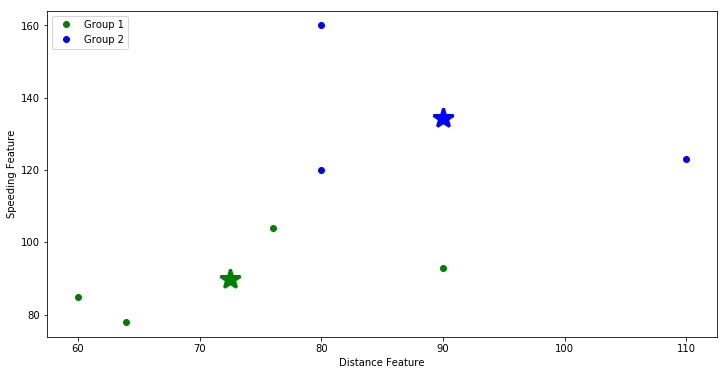

In [33]:
plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'go')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'g*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))
h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'bo')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'b*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))
plt.ylabel('Speeding Feature')
plt.xlabel('Distance Feature')

plt.legend([h1,h2],['Group 1','Group 2'], loc='upper left')
plt.show()